<h1> CIS7026: Business Process and Data Analysis Assignment Workings</h1>
<h2> Part C - Data Analysis with Process Mining </h2>

<b> Please consider the below instructions before executing the code.

- This code is implemented in Python version 3.11.4

- This code is implemented in Mac OS Sanoma Version 14.0 (23A344).

- The code is developed using VS Code.

- Install all the required libraries before executing the code.

- Make sure the event log file is available in the correct location

- Event log file path - data/Road_Traffic_Fine_Management_Process.xes

- If you are downloaded codebase from GitHub, before executing the code "data/Road_Traffic_Fine_Management_Process.xes.zip" file should be unzipped. 
</b>

The following libraries should be installed if they are not installed in your execution environmnt.

In [1]:
!pip install pm4py
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install graphviz

In [2]:
import pm4py
from pm4py.visualization.petri_net import visualizer
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

<h2> Loading the Insurance Claiming Process Event Log File </h2>

In [3]:
# If you are downloaded codebase from GitHub, before executing the code "data/Road_Traffic_Fine_Management_Process.xes.zip" file should be unzipped. 

# Load the Event Log
event_log = pm4py.read_xes("data/Road_Traffic_Fine_Management_Process.xes")

# Explore the Event Log
event_log

parsing log, completed traces ::   0%|          | 0/150370 [00:00<?, ?it/s]

amount org:resource dismissal                concept:name  \
0         35.0          561       NIL                 Create Fine   
1          NaN          NaN       NaN                   Send Fine   
2         35.0          561       NIL                 Create Fine   
3          NaN          NaN       NaN                   Send Fine   
4          NaN          NaN       NaN    Insert Fine Notification   
...        ...          ...       ...                         ...   
561465   131.0           25       NIL                 Create Fine   
561466     NaN          NaN       NaN                   Send Fine   
561467     NaN          NaN       NaN    Insert Fine Notification   
561468   262.0          NaN       NaN                 Add penalty   
561469     NaN          NaN       NaN  Send for Credit Collection   

       vehicleClass  totalPaymentAmount lifecycle:transition  \
0                 A                 0.0             complete   
1               NaN                 NaN             complete   
2                 A                 0.0             complete   
3               NaN                 NaN             complete   
4               NaN                 NaN             complete   
...             ...                 ...                  ...   
561465            A                 0.0             complete   
561466          NaN                 NaN             complete   
561467          NaN                 NaN             complete   
561468          NaN                 NaN             complete   
561469          NaN                 NaN             complete   

                  time:timestamp  article  points case:concept:name  expense  \
0      2006-07-24 00:00:00+00:00    157.0     0.0                A1      NaN   
1      2006-12-05 00:00:00+00:00      NaN     NaN                A1    11.00   
2      2006-08-02 00:00:00+00:00    157.0     0.0              A100      NaN   
3      2006-12-12 00:00:00+00:00      NaN     NaN              A100    11.00   
4      2007-01-15 00:00:00+00:00      NaN     NaN              A100      NaN   
...                          ...      ...     ...               ...      ...   
561465 2002-09-07 00:00:00+00:00    142.0     0.0             V9999      NaN   
561466 2002-10-25 00:00:00+00:00      NaN     NaN             V9999    15.16   
561467 2002-11-04 00:00:00+00:00      NaN     NaN             V9999      NaN   
561468 2003-01-03 00:00:00+00:00      NaN     NaN             V9999      NaN   
561469 2004-01-10 00:00:00+00:00      NaN     NaN             V9999      NaN   

       notificationType lastSent  paymentAmount  matricola  
0                   NaN      NaN            NaN        NaN  
1                   NaN      NaN            NaN        NaN  
2                   NaN      NaN            NaN        NaN  
3                   NaN      NaN            NaN        NaN  
4                     P        P            NaN        NaN  
...                 ...      ...            ...        ...  
561465              NaN      NaN            NaN        NaN  
561466              NaN      NaN            NaN        NaN  
561467                P        N            NaN        NaN  
561468              NaN      NaN            NaN        NaN  
561469              NaN      NaN            NaN        NaN  

[561470 rows x 16 columns]

In [4]:
# Print basic information about the event log
print("Event Log Information:")
print("Number of traces:", len(event_log))
print("Number of events:", sum(len(trace) for trace in event_log))

Event Log Information:
Number of traces: 561470
Number of events: 186


In [5]:
# Print columns in event log file
event_log.columns

Index(['amount', 'org:resource', 'dismissal', 'concept:name', 'vehicleClass',
       'totalPaymentAmount', 'lifecycle:transition', 'time:timestamp',
       'article', 'points', 'case:concept:name', 'expense', 'notificationType',
       'lastSent', 'paymentAmount', 'matricola'],
      dtype='object')

In [6]:
# Convert event log data into a Pandas DataFrame
df = pm4py.convert_to_dataframe(event_log)

df

amount org:resource dismissal                concept:name  \
0         35.0          561       NIL                 Create Fine   
1          NaN          NaN       NaN                   Send Fine   
2         35.0          561       NIL                 Create Fine   
3          NaN          NaN       NaN                   Send Fine   
4          NaN          NaN       NaN    Insert Fine Notification   
...        ...          ...       ...                         ...   
561465   131.0           25       NIL                 Create Fine   
561466     NaN          NaN       NaN                   Send Fine   
561467     NaN          NaN       NaN    Insert Fine Notification   
561468   262.0          NaN       NaN                 Add penalty   
561469     NaN          NaN       NaN  Send for Credit Collection   

       vehicleClass  totalPaymentAmount lifecycle:transition  \
0                 A                 0.0             complete   
1               NaN                 NaN             complete   
2                 A                 0.0             complete   
3               NaN                 NaN             complete   
4               NaN                 NaN             complete   
...             ...                 ...                  ...   
561465            A                 0.0             complete   
561466          NaN                 NaN             complete   
561467          NaN                 NaN             complete   
561468          NaN                 NaN             complete   
561469          NaN                 NaN             complete   

                  time:timestamp  article  points case:concept:name  expense  \
0      2006-07-24 00:00:00+00:00    157.0     0.0                A1      NaN   
1      2006-12-05 00:00:00+00:00      NaN     NaN                A1    11.00   
2      2006-08-02 00:00:00+00:00    157.0     0.0              A100      NaN   
3      2006-12-12 00:00:00+00:00      NaN     NaN              A100    11.00   
4      2007-01-15 00:00:00+00:00      NaN     NaN              A100      NaN   
...                          ...      ...     ...               ...      ...   
561465 2002-09-07 00:00:00+00:00    142.0     0.0             V9999      NaN   
561466 2002-10-25 00:00:00+00:00      NaN     NaN             V9999    15.16   
561467 2002-11-04 00:00:00+00:00      NaN     NaN             V9999      NaN   
561468 2003-01-03 00:00:00+00:00      NaN     NaN             V9999      NaN   
561469 2004-01-10 00:00:00+00:00      NaN     NaN             V9999      NaN   

       notificationType lastSent  paymentAmount  matricola  
0                   NaN      NaN            NaN        NaN  
1                   NaN      NaN            NaN        NaN  
2                   NaN      NaN            NaN        NaN  
3                   NaN      NaN            NaN        NaN  
4                     P        P            NaN        NaN  
...                 ...      ...            ...        ...  
561465              NaN      NaN            NaN        NaN  
561466              NaN      NaN            NaN        NaN  
561467                P        N            NaN        NaN  
561468              NaN      NaN            NaN        NaN  
561469              NaN      NaN            NaN        NaN  

[561470 rows x 16 columns]

<h2> Process Discovery </h2>

<h3> Process Discovery using alpha miner </h3>

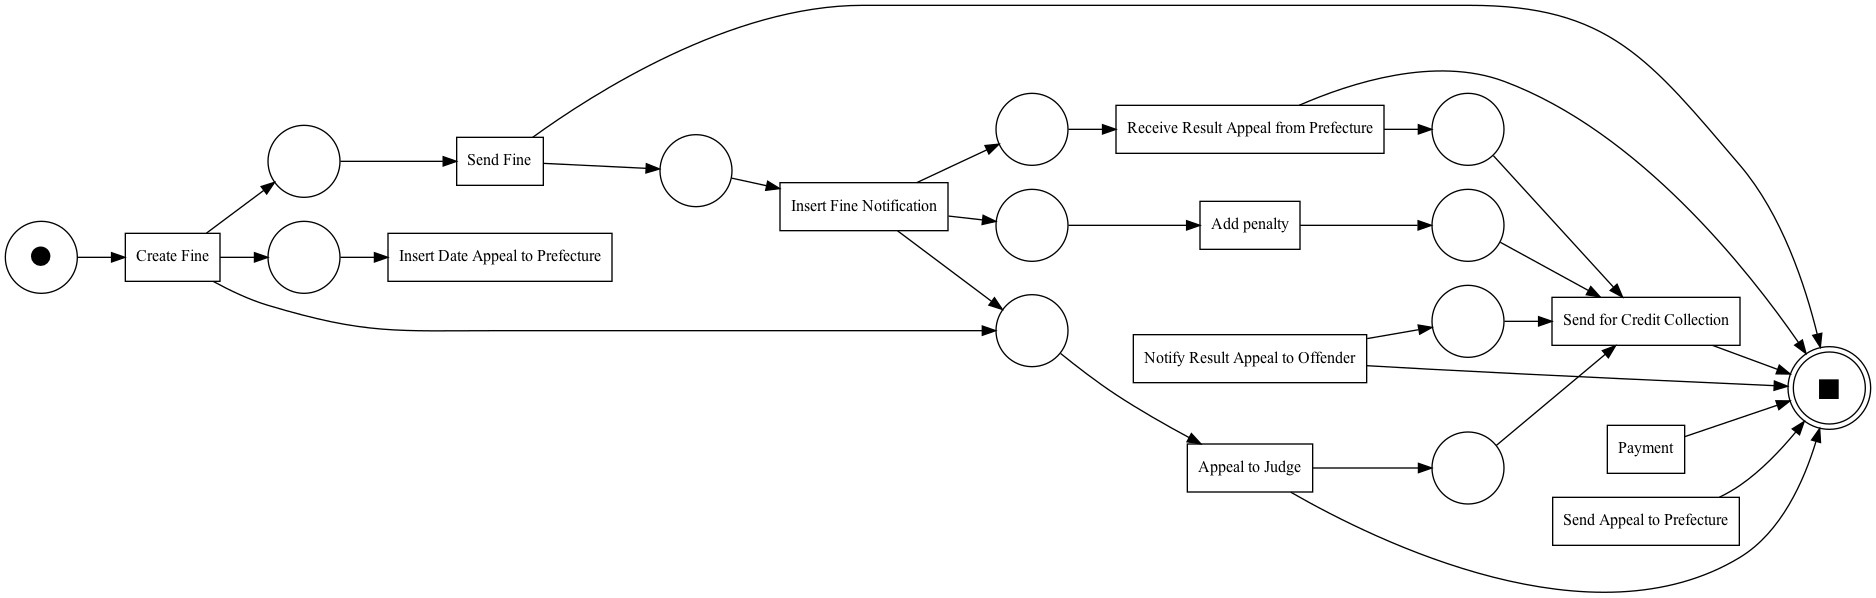

replaying log with TBR, completed traces ::   0%|          | 0/231 [00:00<?, ?it/s]

''

In [7]:
# Apply Alpha Miner process discovery algorithm
alpha_net, initial, final = alpha_miner.apply(event_log)

# Visualize process model as a Petri nets
pm4py.view_petri_net(alpha_net, initial, final)

# Define parameters for the visualizer, specifying the output format
parameters = {visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}

# Apply the visualizer to generate a visualization of the Petri net
viz = visualizer.apply(alpha_net, initial, final , parameters=parameters,
                      variant = visualizer.Variants.FREQUENCY, log=event_log)

# Save the generated visualization as a PNG image
visualizer.save(viz, 'alpha_miner_petri_net.png')

<h3> Process Discovery using Inductive miner </h3>

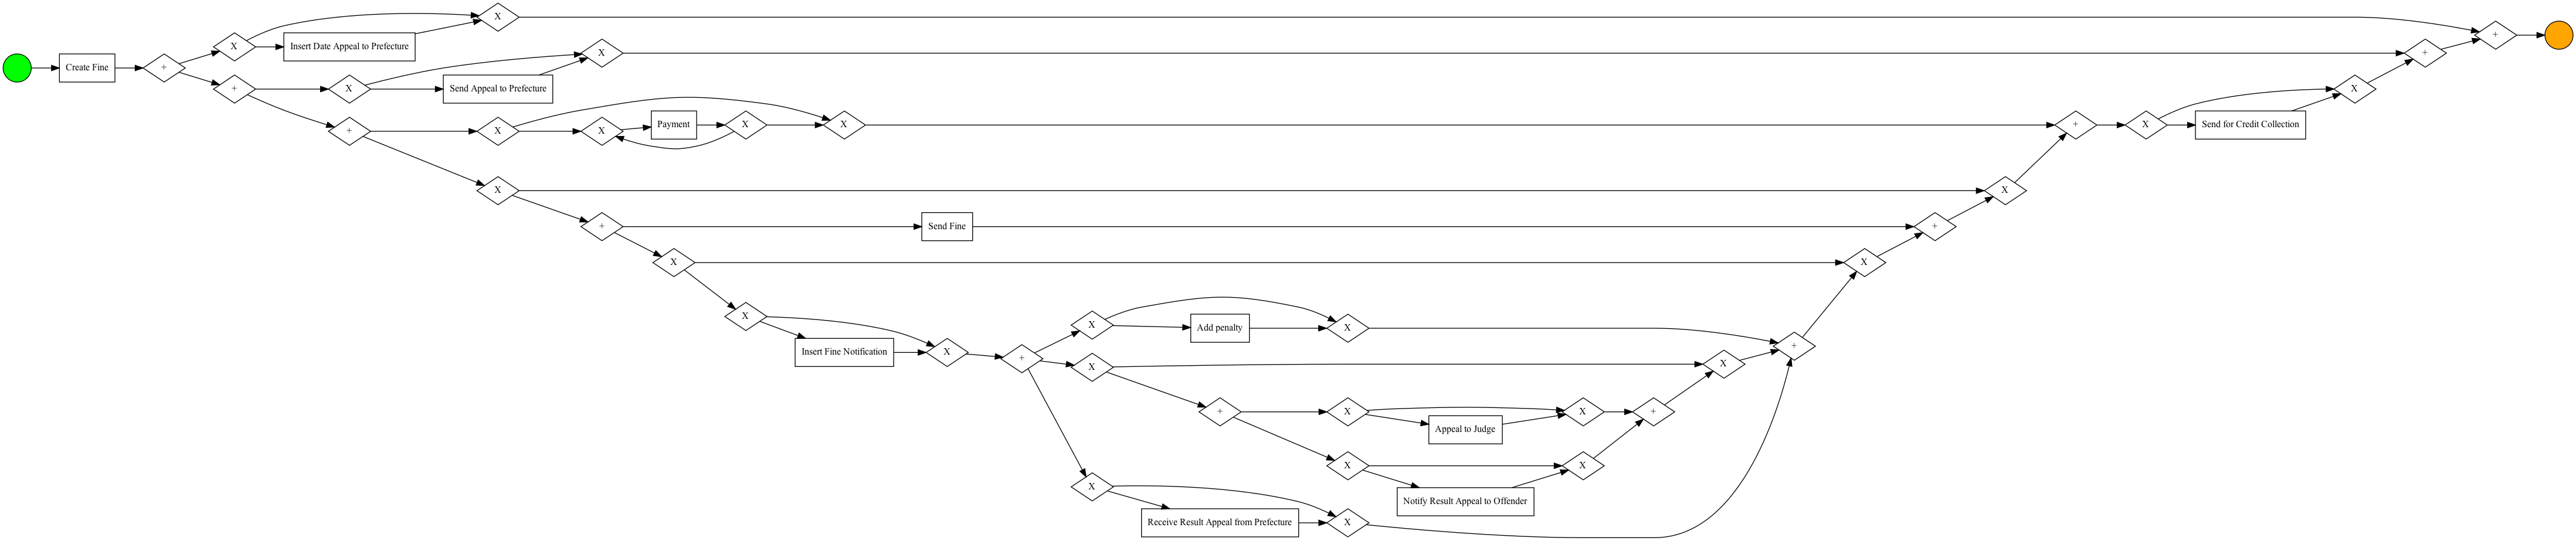

In [8]:
# Discovering the BPMN process model from the event log using the inductive miner algorithm
inductive_bpnm_process_model = pm4py.discover_bpmn_inductive(event_log)

# Visualizing the discovered process model as a BPNM diagram
pm4py.view_bpmn(inductive_bpnm_process_model)

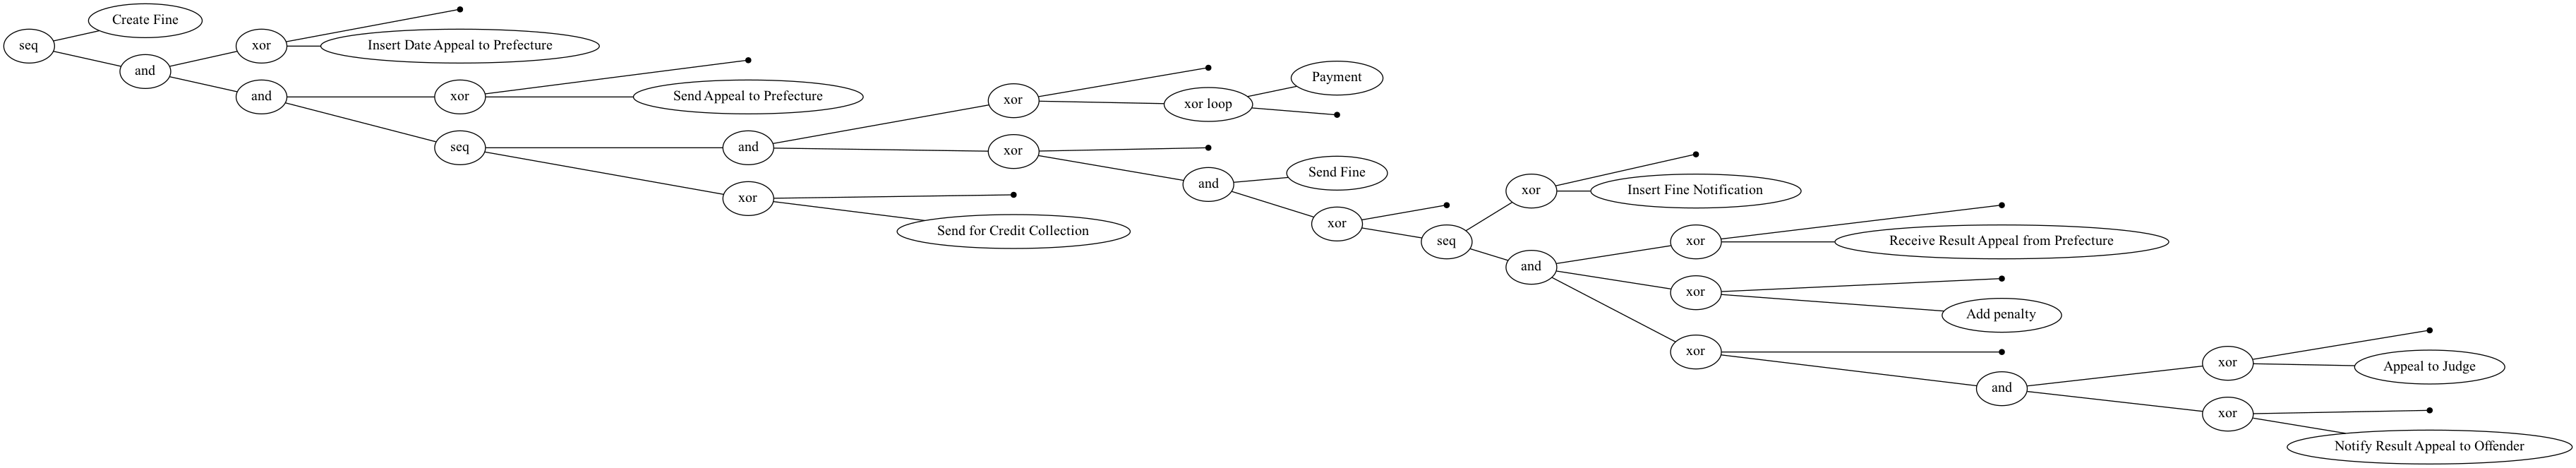

In [9]:
# Discovering an inductive process model using the event log data
inductive_process_tree_process_model = pm4py.discover_process_tree_inductive(event_log)

# Visualizing the discovered process model as a process tree
pm4py.view_process_tree(inductive_process_tree_process_model)

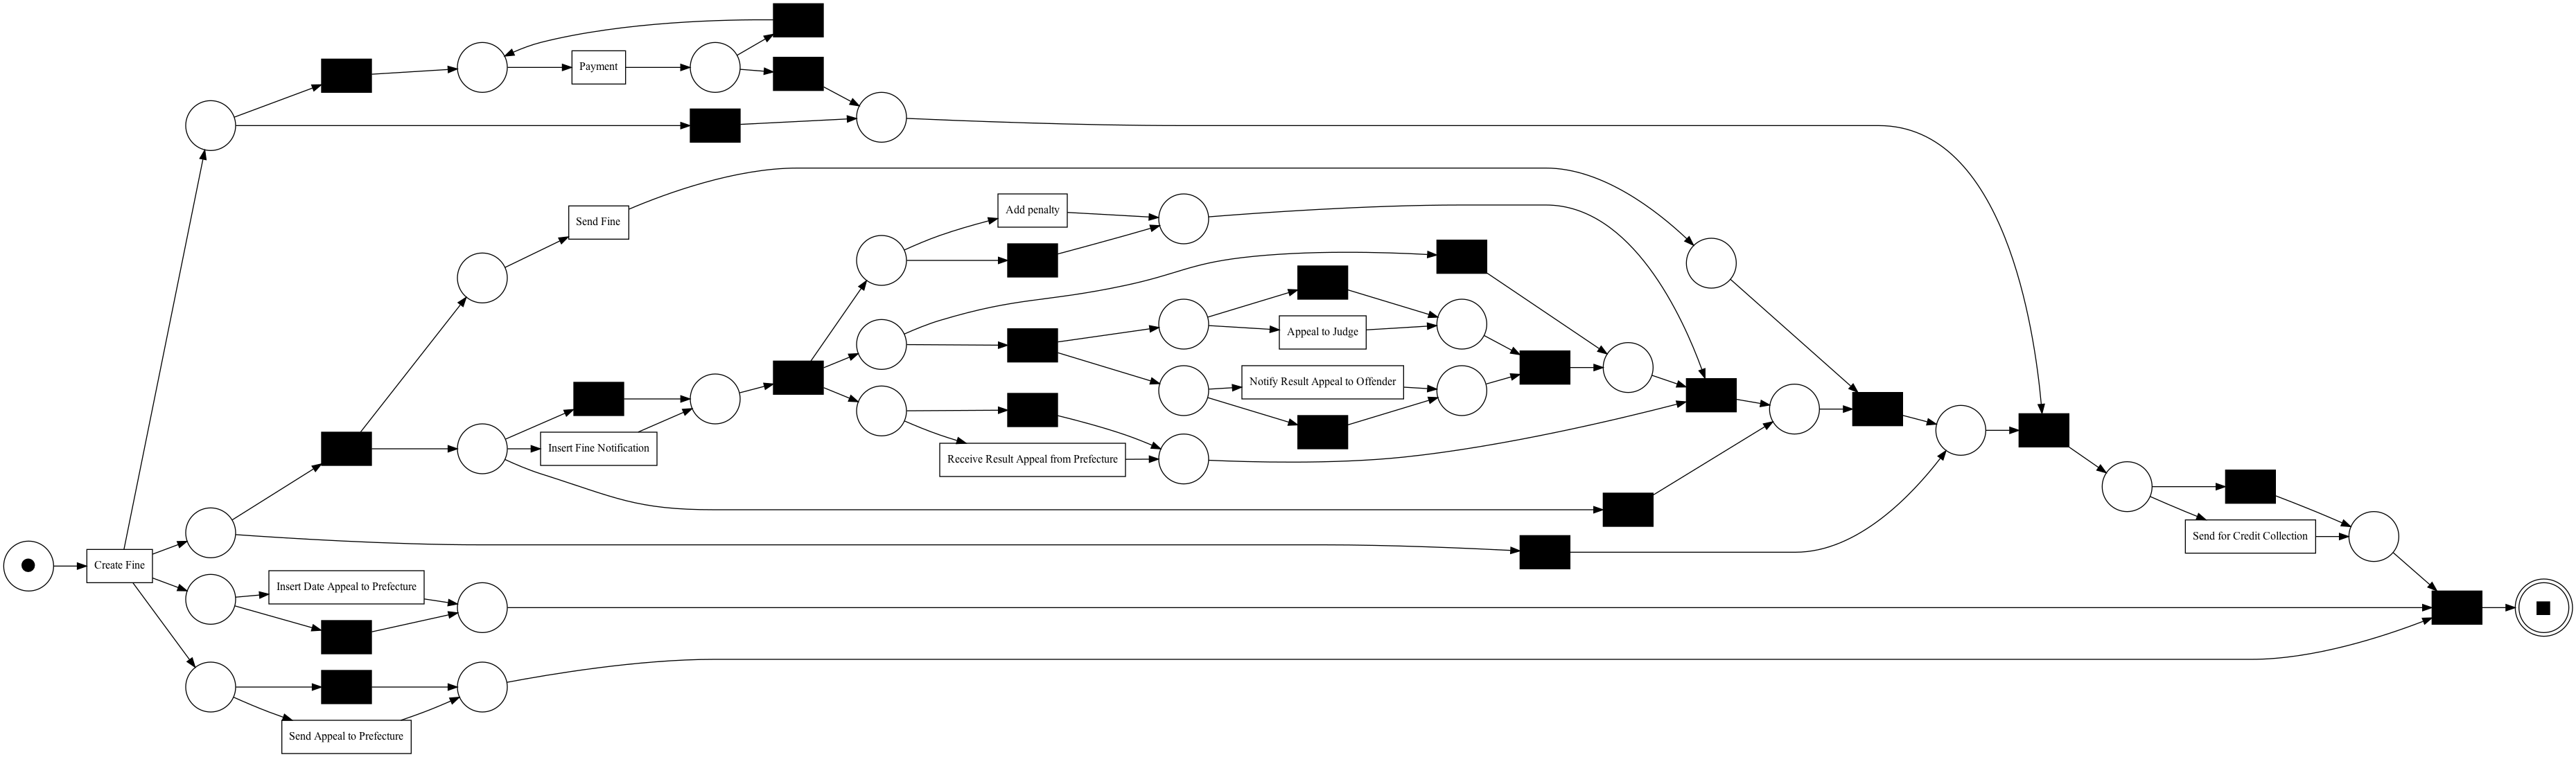

replaying log with TBR, completed traces ::   0%|          | 0/231 [00:00<?, ?it/s]

''

In [10]:
# Discovering a Petri net model using the inductive miner algorithm
inductive_net, initial, final = pm4py.discover_petri_net_inductive(event_log)

# Viewing the discovered Petri net model
pm4py.view_petri_net(inductive_net, initial, final)

# Define parameters for the visualizer, specifying the output format
parameters = {visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}

# Apply the visualizer to generate a visualization of the Petri net
inductive_viz = visualizer.apply(inductive_net, initial, final, parameters=parameters,
                      variant = visualizer.Variants.FREQUENCY, log=event_log)

# Save the generated visualization as a PNG image
visualizer.save(inductive_viz, 'inductive_miner_petri_net.png')

<h3> Dicovering the process as directly flow graph </h3>

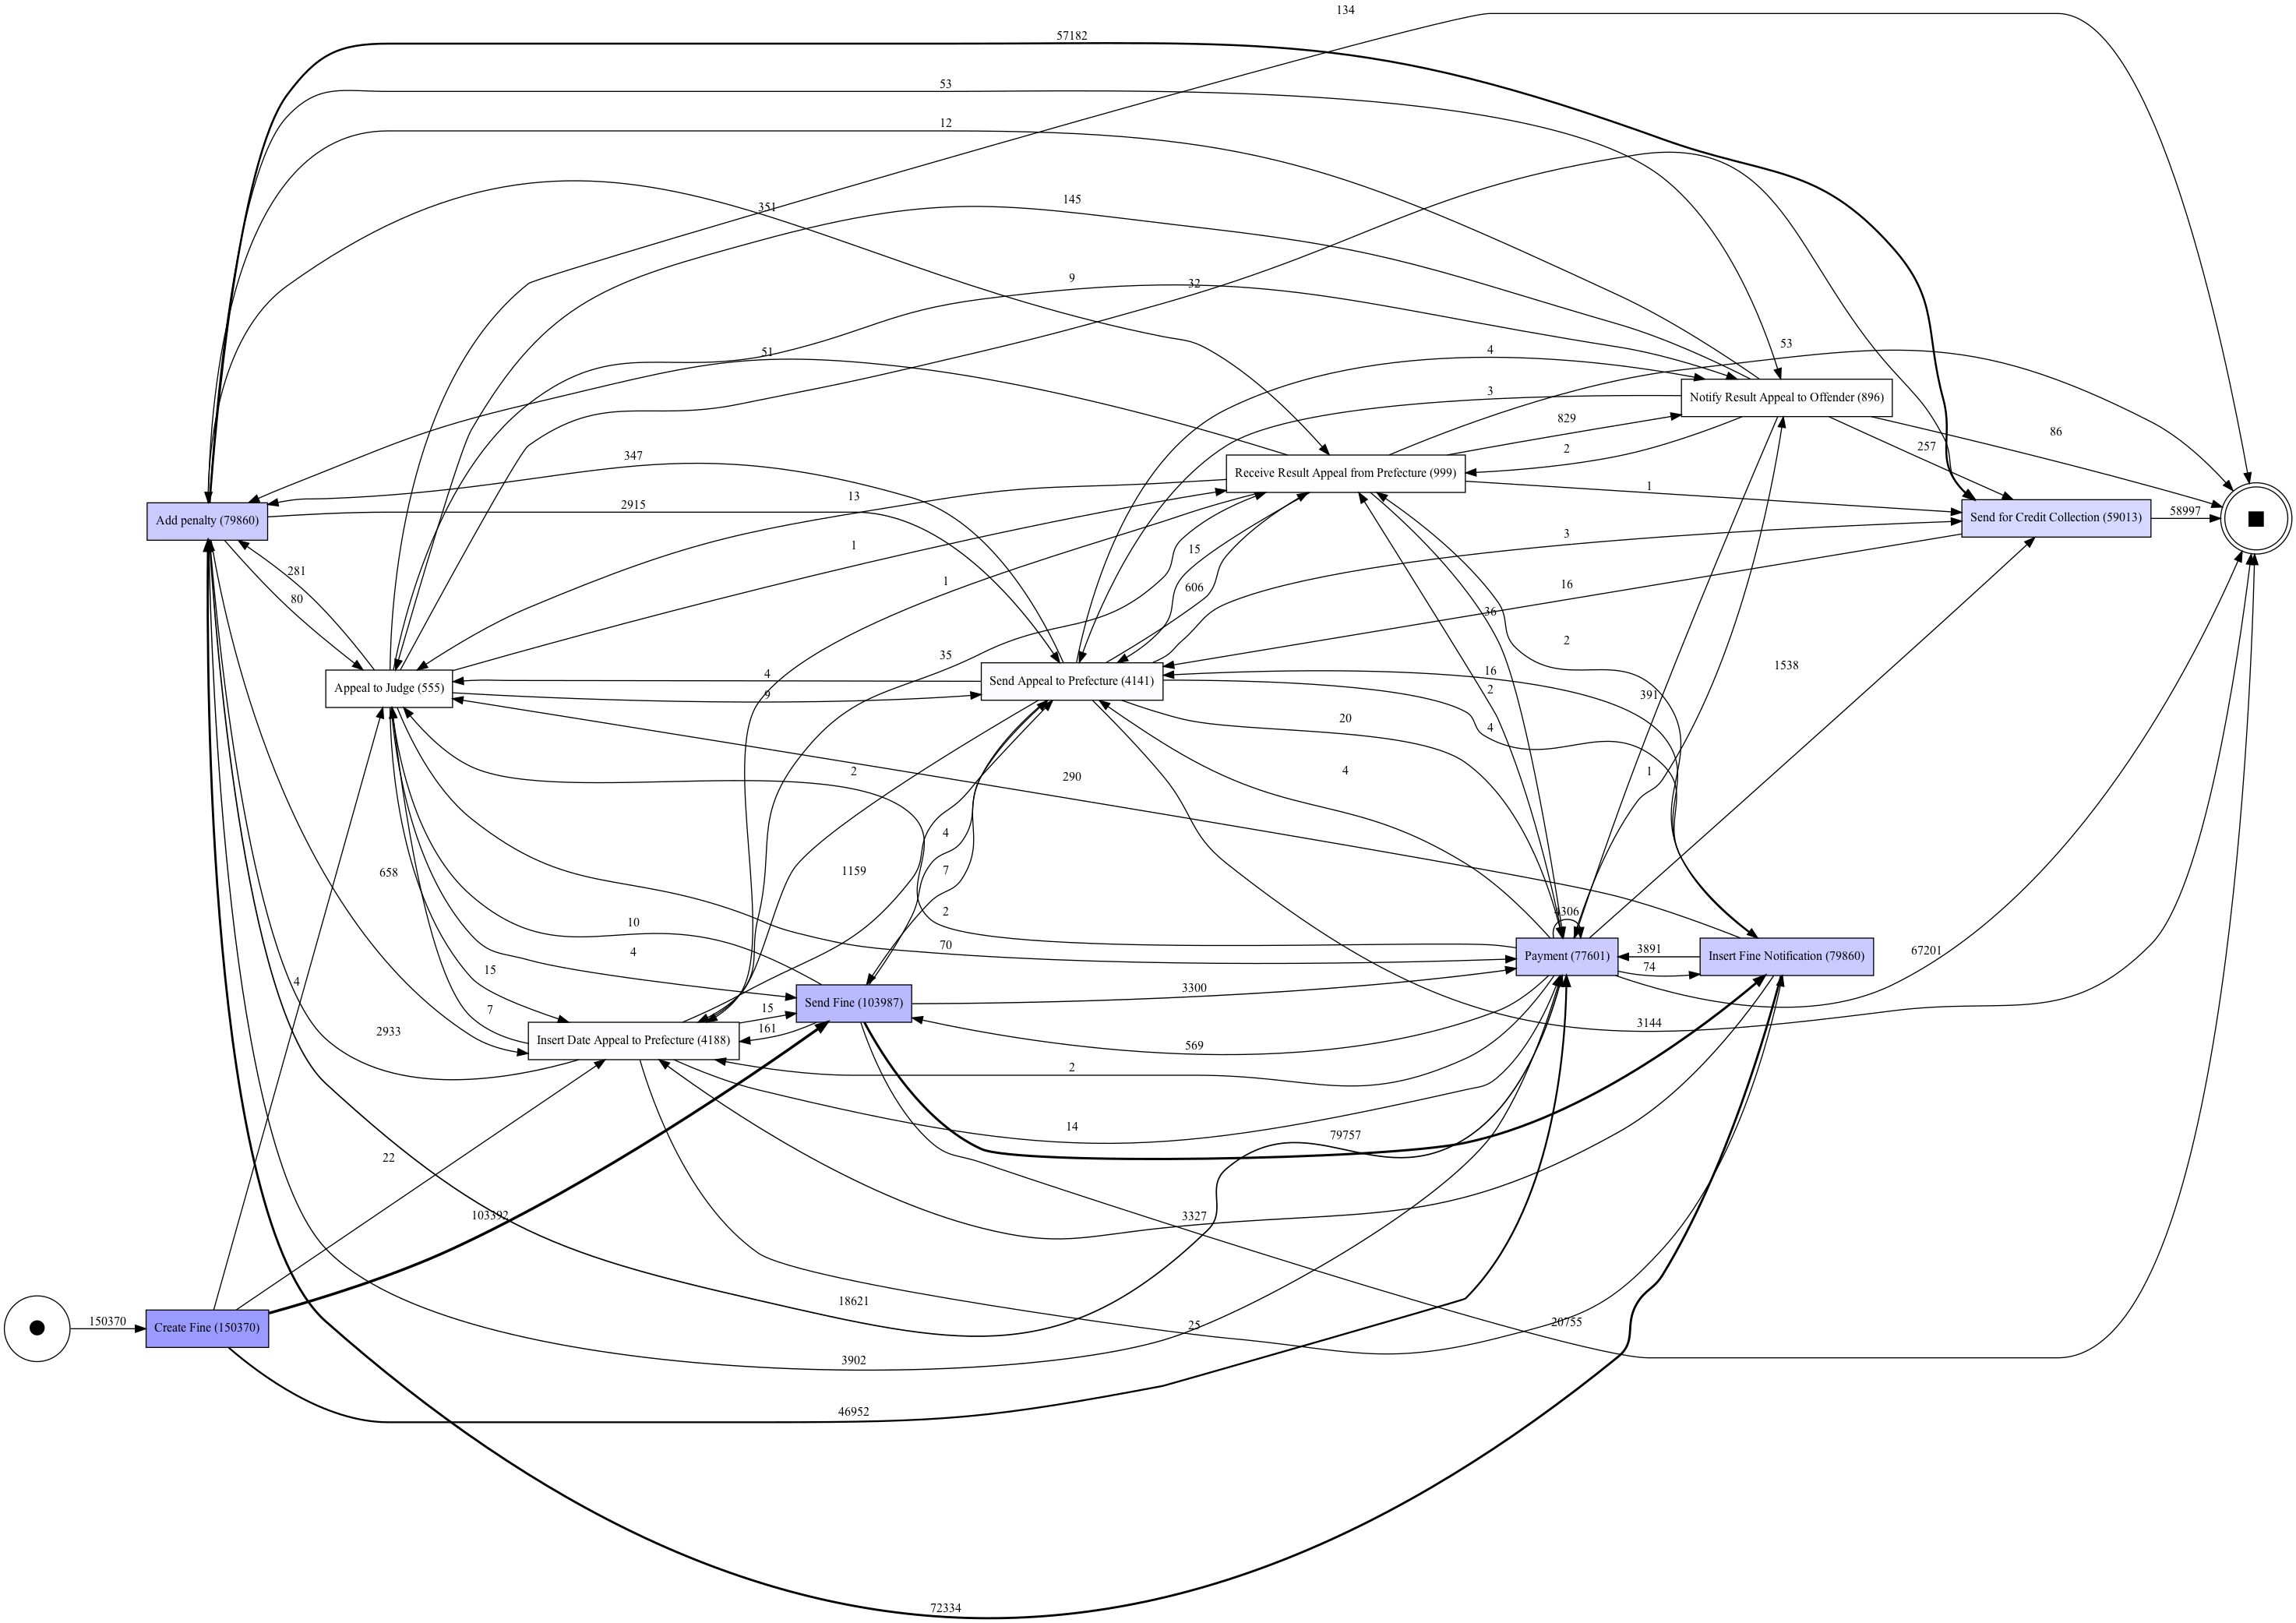

In [11]:
# Discovering the Directly Follows Graph (DFG) from the event log
dgf, start_activity, end_activity = pm4py.discover_dfg(event_log)

# Viewing the DFG along with start and end activities
pm4py.view_dfg(dgf, start_activity, end_activity)

<h2> Confirmance Checking </h2>

token-based conformance checking technique is used for compute the metrics.

<h3> Confirmance checking for the process model dicovered via alpha mining </h3>

In [12]:
# Discover the process model using Alpha Miner algorithm
alpha_net_confirmance, initial, final = pm4py.discover_petri_net_alpha(event_log)

# Calculate fitness using token-based replay
fitness_token_based_replay = pm4py.fitness_token_based_replay(event_log, alpha_net_confirmance, initial, final)

# Calculate generalization using token-based replay
generalization_tbr = pm4py.generalization_tbr(event_log, alpha_net_confirmance, initial, final)

# Calculate simplicity of the Petri net
simplicity_petri_net = pm4py.simplicity_petri_net(alpha_net_confirmance, initial, final)

# Calculate precision using token-based replay
precision_token_based_replay = pm4py.precision_token_based_replay(event_log, alpha_net_confirmance, initial, final)

# Perform conformance diagnostics using token-based replay
conformance_diagnostics = pm4py.conformance_diagnostics_token_based_replay(event_log, alpha_net_confirmance, initial, final)

# Print computed conformance metrics
print("Fitness:", fitness_token_based_replay)
print("Generalization:", generalization_tbr)
print("Simplicity:", simplicity_petri_net)
print("Precision", precision_token_based_replay)

# Show conformance diagnostics results
conformance_diagnostics

replaying log with TBR, completed traces ::   0%|          | 0/231 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/231 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/271 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/231 [00:00<?, ?it/s]

Fitness: {'perc_fit_traces': 0.0, 'average_trace_fitness': 0.6741431381488104, 'log_fitness': 0.637766272135165, 'percentage_of_fitting_traces': 0.0}
Generalization: 0.9855500389488964
Simplicity: 0.6571428571428571
Precision 0.5207304559303021


[{'trace_is_fit': False,
  'trace_fitness': 0.75,
  'activated_transitions': [(Create Fine, 'Create Fine'),
   (Send Fine, 'Send Fine')],
  'reached_marking': ["({'Create Fine', 'Insert Fine Notification'}, {'Appeal to Judge'}):1", "({'Create Fine'}, {'Insert Date Appeal to Prefecture'}):1", "({'Send Fine'}, {'Insert Fine Notification'}):1", 'end:1'],
  'enabled_transitions_in_marking': {(Appeal to Judge, 'Appeal to Judge'),
   (Insert Date Appeal to Prefecture, 'Insert Date Appeal to Prefecture'),
   (Insert Fine Notification, 'Insert Fine Notification'),
   (Notify Result Appeal to Offender, 'Notify Result Appeal to Offender'),
   (Payment, 'Payment'),
   (Send Appeal to Prefecture, 'Send Appeal to Prefecture')},
  'transitions_with_problems': [],
  'missing_tokens': 0,
  'consumed_tokens': 3,
  'remaining_tokens': 3,
  'produced_tokens': 6},
 {'trace_is_fit': False,
  'trace_fitness': 0.6060606060606061,
  'activated_transitions': [(Create Fine, 'Create Fine'),
   (Send Fine, 'Send 

<h3> Confirmance checking for the process model dicovered via inductive mining </h3>

In [13]:
# Discover the process model using Alpha Miner algorithm
inductive_net_confirmance, initial, final = pm4py.discover_petri_net_inductive(event_log)

# Calculate fitness using token-based replay
fitness_token_based_replay = pm4py.fitness_token_based_replay(event_log, inductive_net_confirmance, initial, final)

# Calculate generalization using token-based replay
generalization_tbr = pm4py.generalization_tbr(event_log, inductive_net_confirmance, initial, final)

# Calculate simplicity of the Petri net
simplicity_petri_net = pm4py.simplicity_petri_net(inductive_net_confirmance, initial, final)

# Calculate precision using token-based replay
precision_token_based_replay = pm4py.precision_token_based_replay(event_log, inductive_net_confirmance, initial, final)

# Perform conformance diagnostics using token-based replay
conformance_diagnostics = pm4py.conformance_diagnostics_token_based_replay(event_log, inductive_net_confirmance, initial, final)

# Print computed conformance metrics
print("Fitness:", fitness_token_based_replay)
print("Generalization:", generalization_tbr)
print("Simplicity:", simplicity_petri_net)
print("Precision", precision_token_based_replay)

# Show conformance diagnostics results
conformance_diagnostics

replaying log with TBR, completed traces ::   0%|          | 0/231 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/231 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/271 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/231 [00:00<?, ?it/s]

Fitness: {'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}
Generalization: 0.9752594106217893
Simplicity: 0.6237623762376238
Precision 0.6238407340453742


[{'trace_is_fit': True,
  'trace_fitness': 1.0,
  'activated_transitions': [(b88b861f-ee78-4b9c-a5f8-3c8a98a40f4d, 'Create Fine'),
   (tauSplit_15, None),
   (8657f0f9-8ee1-40f8-834e-432ff68a60f9, 'Send Fine'),
   (skip_3, None),
   (skip_6, None),
   (skip_9, None),
   (skip_17, None),
   (tauJoin_16, None),
   (tauJoin_8, None),
   (skip_28, None),
   (tauJoin_2, None)],
  'reached_marking': ['sink:1'],
  'enabled_transitions_in_marking': set(),
  'transitions_with_problems': [],
  'missing_tokens': 0,
  'consumed_tokens': 16,
  'remaining_tokens': 0,
  'produced_tokens': 16},
 {'trace_is_fit': True,
  'trace_fitness': 1.0,
  'activated_transitions': [(b88b861f-ee78-4b9c-a5f8-3c8a98a40f4d, 'Create Fine'),
   (tauSplit_15, None),
   (8657f0f9-8ee1-40f8-834e-432ff68a60f9, 'Send Fine'),
   (b9671f72-ad4e-40fe-8bd0-94ca30f4384e, 'Insert Fine Notification'),
   (tauSplit_19, None),
   (3ae69d56-dbe7-41d2-8ce6-0acf55beb3a1, 'Add penalty'),
   (skip_9, None),
   (skip_22, None),
   (skip_27

<h2> Enhancement of Business Processes </h2>

<h3>Advanced Variant Itentification and Analysis </h3>

In [14]:
# Variants Identification
def identify_variants(event_log):
    # Group event log data by case ID and concatenate activity names into sequences
    variants = event_log.groupby('case:concept:name')['concept:name'].apply(lambda x: ' -> '.join(x)).reset_index()
    return variants

# Perform variants identification
identified_variants = identify_variants(event_log)
print("\nIdentified Variants:")
print(identified_variants.head())

# Save the identifed variants to csv file
identified_variants.to_csv('identified_variant.csv')


Identified Variants:
  case:concept:name                                       concept:name
0                A1                           Create Fine -> Send Fine
1              A100  Create Fine -> Send Fine -> Insert Fine Notifi...
2            A10000  Create Fine -> Send Fine -> Insert Fine Notifi...
3            A10001  Create Fine -> Send Fine -> Insert Fine Notifi...
4            A10004  Create Fine -> Send Fine -> Insert Fine Notifi...


<h4> Visualize the variants using process map </h4>

/var/folders/7n/hj2506mx5f96h7w11f8kg2v40000gn/T/ipykernel_6662/1098215748.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='concept:name', data=activity_counts, palette='viridis')


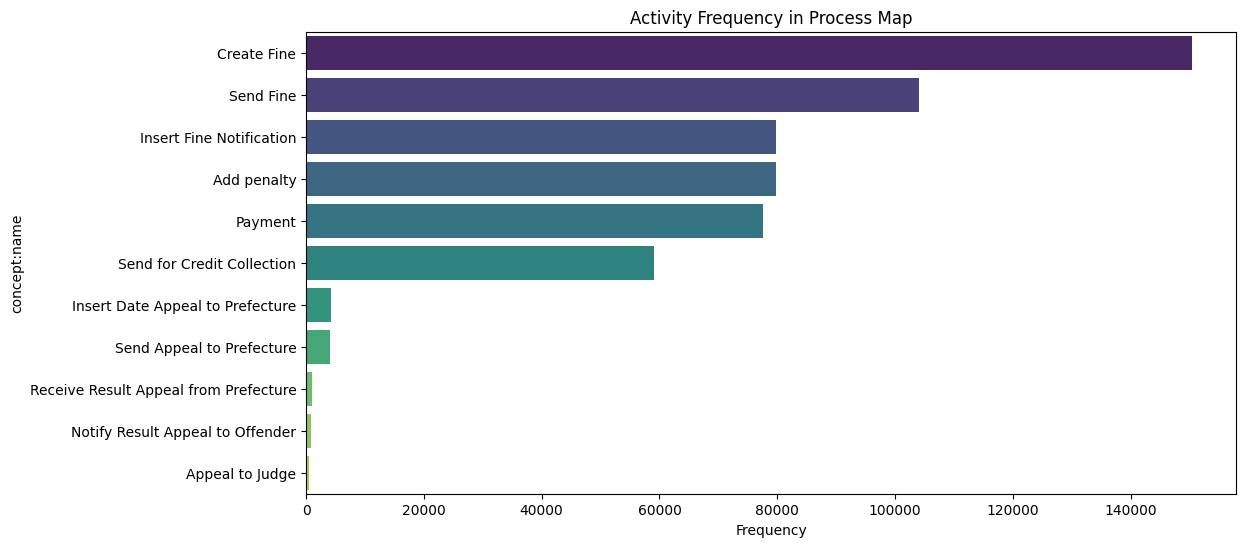

In [15]:
# Visualize the variants using process map
def plot_process_map(variants):
    # Split activity sequences and count the frequency of each activity
    activities = ' -> '.join(variants['concept:name']).split(' -> ')
    activity_counts = pd.Series(activities).value_counts().reset_index()
    activity_counts.columns = ['concept:name', 'Frequency']

    # Plot process map
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Frequency', y='concept:name', data=activity_counts, palette='viridis')
    plt.title('Activity Frequency in Process Map')
    plt.xlabel('Frequency')
    plt.ylabel('concept:name')
    plt.show()

# Visualize Process Map
plot_process_map(identified_variants)

<h3> Probabilistic Modeling <h3>

In [16]:
# Probabilistic Modeling
def probabilistic_modeling(variants):
    # Compute transition probabilities between activities
    transitions = {}
    for variant in variants['concept:name']:
        activities = variant.split(' -> ')
        for i in range(len(activities) - 1):
            transition = (activities[i], activities[i + 1])
            transitions[transition] = transitions.get(transition, 0) + 1
    
    # Normalize transition counts to obtain probabilities
    total_transitions = sum(transitions.values())
    transition_probabilities = {transition: count / total_transitions for transition, count in transitions.items()}
    
    return transition_probabilities

# Perform probabilistic modeling
transition_probabilities = probabilistic_modeling(identified_variants)
print("\nTransition Probabilities:")
for transition, probability in transition_probabilities.items():
    print(f"{transition}: {probability}")


Transition Probabilities:
('Create Fine', 'Send Fine'): 0.25150085137436146
('Send Fine', 'Insert Fine Notification'): 0.19400875699343226
('Insert Fine Notification', 'Add penalty'): 0.17595232303575772
('Add penalty', 'Send for Credit Collection'): 0.13909511067866698
('Add penalty', 'Payment'): 0.04529554852833861
('Insert Fine Notification', 'Insert Date Appeal to Prefecture'): 0.008092921430308927
('Insert Date Appeal to Prefecture', 'Add penalty'): 0.007134517149112138
('Add penalty', 'Send Appeal to Prefecture'): 0.007090732181950864
('Create Fine', 'Payment'): 0.11421065434200925
('Payment', 'Payment'): 0.010474337144247142
('Add penalty', 'Insert Date Appeal to Prefecture'): 0.0016005837995621503
('Insert Date Appeal to Prefecture', 'Send Appeal to Prefecture'): 0.002819265385550961
('Insert Date Appeal to Prefecture', 'Payment'): 3.405497445876916e-05
('Payment', 'Add penalty'): 0.009491607881294089
('Payment', 'Send for Credit Collection'): 0.0037411821941133543
('Send Appe

<h4> Visualize Probabilistic Modeling </h4>

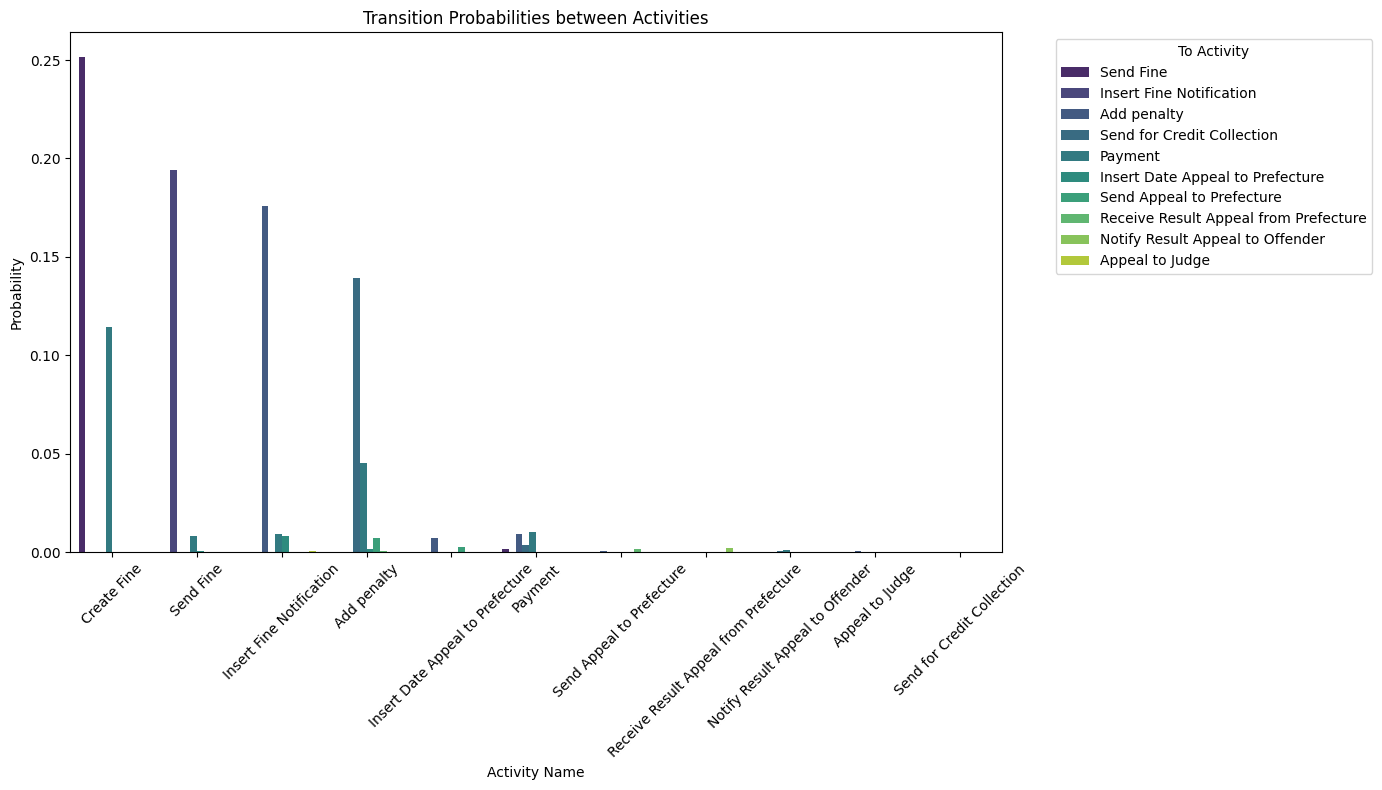

In [17]:
# Visualize Probabilistic Modeling
def plot_probabilistic_modeling(transition_probabilities):
    # Create DataFrame from transition probabilities
    transition_df = pd.DataFrame(list(transition_probabilities.items()), columns=['Transition', 'Probability'])
    transition_df[['From', 'To']] = pd.DataFrame(transition_df['Transition'].tolist(), index=transition_df.index)

    # Plot probabilistic modeling results
    plt.figure(figsize=(14, 8))
    sns.barplot(x='From', y='Probability', hue='To', data=transition_df, palette='viridis')
    plt.title('Transition Probabilities between Activities')
    plt.xlabel('Activity Name')
    plt.ylabel('Probability')
    plt.legend(title='To Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Visualize Probabilistic Modeling
plot_probabilistic_modeling(transition_probabilities)